Visualizing and Understanding networks
===

In the notebook, we introduce the tools that are use in this repository to illustrate the network studied in the differents problems. The goal of those representation is to gain a better understanding of problem at stack. 


We first import the packages we need to build our visualisation.

In [21]:
# Database Providing the datasets
import pymongo as pm
# Data manipulation
import pandas as pd
# Network 
import networkx as nx
# Datavisualization tool
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap as basemap

(if you have troubles instaling basemap on an anaconda environnement see: https://github.com/conda-forge/basemap-feedstock/issues/30)

Collecting the dataset
---

Prepare the database client to makes queries, and collect the dataset we need. The data are store in a database MongoDB organised by **topic** and **author**. Given those two elements you can decide which database and which collection to use.

In [2]:
mongo_host='ns396089.ip-37-59-38.eu'
mongo_port=32771

author= "Mark S. Daskin"
topic = "NETWORK-AND-DISCRETE-LOCATION"

client = pm.MongoClient(mongo_host, mongo_port)

# Collection where we wich to store our problem
problems = client[topic]["datasets"] # client.[db name].[collection name]

Query one dataset and select it based on the metadatas. The relevant metadata to seach on in our cas are the **author** and the **name** of the problem (using the key dataset).

In [19]:
# fetch the first problem matching our search criteras
q = {
    "metadata.author": "Mark S. Daskin",
    "metadata.dataset": "49-nodes"
} # query select the desired intances
f = {} # filter | select the desired fields
record = problems.find_one(q)

Reformat the dataset to be easy to use via **pandas**. The datasets we have downloaded contains contains the **geographic information** of cities in the USA (longitude, and latitide) as well as **demographic datas** and cost indicator.

In [20]:
df= pd.DataFrame.from_dict(record["data"])
df= df.set_index(['ID'])
df.head()

,LATITUDE,LONGITUDE,STATE POP,CITY POP,FIXED COST,CITY
ID,,,,,,
1,121.467360,38.566850,29760021,369365,115800,< Sacramento CA >
2,73.799017,42.665750,17990455,101082,101800,< Albany NY >
11,84.422592,33.762900,6478216,394017,71200,< Atlanta GA >
12,77.474584,37.531050,6187358,203056,66600,< Richmond VA >
13,71.017892,42.336029,6016425,574283,161400,< Boston MA >


## Visualising the data

First we convert our dataFrame into a Graph by usinf **netwokx**. Note that the function `add_nodes_from` takes as input a list of tuple `(node, attribute)` thus we need make a small data manipulation: `df.T.to_dict().items()` provide the pair `(key, value)` which is exactly what we want.

In [60]:
G = nx.Graph()
G.add_nodes_from(df.T.to_dict().items())

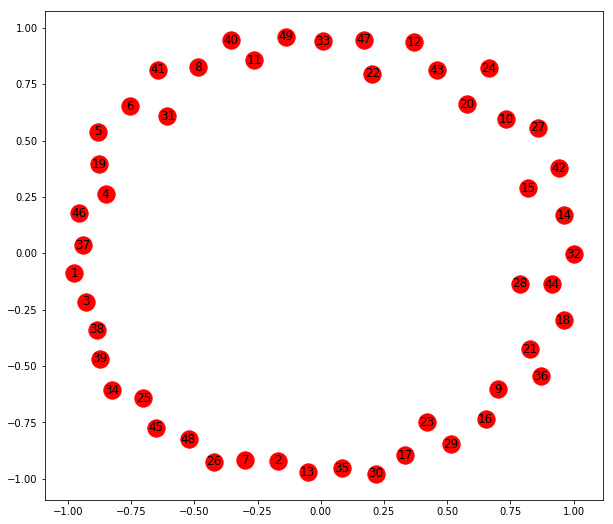

In [62]:
plt.figure(figsize = (10,9))
nx.draw_networkx(G)
plt.show()